#### Naive Bayes

**probability**
- pick a random card, what is the probability of getting a queen? (4 queens, 52 cards,  P(queen) = 4/52 = 1/13)
- Pick a card, you know it is a diamond. Now what is the probability of that card being a queen? (13 diamond, 1 queen P(queen/diamond) = 1/13)
- this is a condition probability that you know event B has occured and now you are trying to predict the probability of
- P(A/B) = probability of event A knowing that event B has already occured.
- P(A/B) = (P(B/A)*P(A))/P(B) -> (formula by Thomas Bayes)

**Example**
- P(queen/diamond) = (P(diamond/queen)*P(queen))/P(diamond)
    - P(diamond/queen) = 1/4
    - P(queen) = 1/13
    - P(diamond) = 1/4
    - P(queen/diamond) = (1/4 * 1/13)/(1/4) = 1/13

**Problem**
- We have data of titanic with(gender, class, age, fare) predict survival rate
- P(Survived/Gender & Class & Age & Fare)

**Why Naive Bayes**
- we are making a **naive** assumption that features such as gender, class, age, cabin, fare etc. are independent of each other.

In [1]:
import pandas as pd
titanic_df = pd.read_csv("ML_Algo_Datasets/titanic.csv")
titanic_df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [2]:
titanic_df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis="columns", inplace=True)
titanic_df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [3]:
inputs = titanic_df.drop(["Survived"], axis="columns")
target = titanic_df.Survived

dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [4]:
inputs = pd.concat([inputs, dummies], axis="columns")
inputs.drop(["Sex"], axis="columns", inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [5]:
inputs.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [6]:
inputs.Age = inputs.Age.fillna(inputs["Age"].mean())
inputs.isna().any()

Pclass    False
Age       False
Fare      False
female    False
male      False
dtype: bool

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size=0.2)

print(len(X_train), len(X_test), len(inputs))

712 179 891


In [8]:
# there are a couple of Naive Bayes class
# we are using GaussianNB -> used when distribution is normal
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [9]:
model.fit(X_train, Y_train)

GaussianNB()

In [10]:
model.score(X_test, Y_test)

0.7877094972067039

In [11]:
X_test[:10]

,Pclass,Age,Fare,female,male
834,3,18.000000,8.3000,False,True
490,3,29.699118,19.9667,False,True
36,3,29.699118,7.2292,False,True
507,1,29.699118,26.5500,False,True
439,2,31.000000,10.5000,False,True
244,3,30.000000,7.2250,False,True
685,2,25.000000,41.5792,False,True
151,1,22.000000,66.6000,True,False
201,3,29.699118,69.5500,False,True
455,3,29.000000,7.8958,False,True


In [12]:
Y_test[:10]

834    0
490    0
36     1
507    1
439    0
244    0
685    0
151    1
201    0
455    1
Name: Survived, dtype: int64

In [13]:
model.predict(X_test[:10]) # you can compare this prediction to Y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [14]:
model.predict_proba(X_test[:10])

array([[0.98823904, 0.01176096],
       [0.9907875 , 0.0092125 ],
       [0.99071107, 0.00928893],
       [0.91651569, 0.08348431],
       [0.97942862, 0.02057138],
       [0.99073663, 0.00926337],
       [0.97136785, 0.02863215],
       [0.002426  , 0.997574  ],
       [0.97297157, 0.02702843],
       [0.9906759 , 0.0093241 ]])

**Email Spam Detection**

In [15]:
spam_df = pd.read_csv("ML_Algo_Datasets/spam.csv")
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
spam_df.groupby("Category").count()

,Message
Category,
ham,4825
spam,747


In [17]:
spam_df["spam"] = spam_df["Category"].apply(lambda x: 1 if x=="spam" else 0)
spam_df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(spam_df.Message, spam_df.spam, test_size=0.25)

**How do we classify message as numbers?**

- **Count vectorizor Technique**
    - suppose you have 4 documents with following text
        1) This is the first document.
        2) This is the second document.
        3) And this is the third one.
        4) Is this the first one?
    - one of the way to convert into a vctor or matrix is that, find out the unique words in each document.
    - and, document, first, is, one, second, the, third, this (total 9 unique words)
    - use these 9 words as features(columns) and built a matrix.
    
       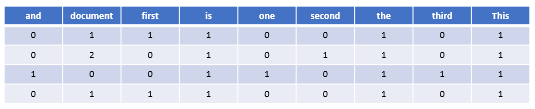



In [19]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

there are three kind of classifier in naive bayes
1) **Bernoulli Naive Bayes** - It assumes that all our features are binary such that they take only two values. Means **0s** can represent "word does not occur in the document" and **1s** as "word occur in the document"
2) **Multinomial Naive Bayes** - It is used when we have **discrete data**(e.g. movie ratings ranging 1 and 5 as each rating will have certian **frequency** to represent)
3) **Gaussian Naive Bayes** - Because of the assumption of the **normal distribution**, Gaussian Naive Bayes is used in cases when all our features are **continous**. For example in **Iris Dataset** features are sepal width, petal width, sepal length petal length. So its features can have different values in data set as width and length can vary. We can't represent features in terms of their occurences. This means data is continous. Hence use Gaussian Naive Bayes here.

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, Y_train)

MultinomialNB()

In [21]:
emails = [
    "Mey Mohan, can we get together to watch football game tomorrow",
    "Upto 20% discount on parking. exclusive offer just for you."
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [22]:
X_test_count = v.transform(X_test)
model.score(X_test_count, Y_test)

0.9877961234745154

In [23]:
# sklearn also have pipeline to simplify above code
# we dont have to vectorize text if we use pipeline

from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])

pipe.fit(X_train, Y_train) # we can directly give X_train

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [24]:
pipe.score(X_test, Y_test)

0.9877961234745154

In [25]:
pipe.predict(emails)

array([0, 1], dtype=int64)